![BTS](img/Logo-BTS.jpg)

# Session 10: Distributions

### Juan Luis Cano Rodríguez <juan.cano@bts.tech> - Data Science Foundations (2018-11-06)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Juanlu001/bts-mbds-data-science-foundations/blob/master/sessions/10-Distributions.ipynb)

## Exercise 1: The class size paradox

The data below is a survey of class sizes in a university.

1. Turn the `data` into a pandas `Series`
2. What's the probability of each value within the data? Sort it and represent it in a bar plot (this is the **probability mass function** or PMF)
3. Perform the cumulative sum of these values and represent it in another bar plot
4. Compute how many classes are in the range $[5, 9]$, in the range $[10, 14]$... and so forth, until $[45, 49]$
5. Sort and plot the previous result and compare it to the histogram of the original data
6. Imagine that we survey each student and ask them how many students are in their class. How can we compute these results from the data that we have?
7. What is the average of the responses? Why do we get such result?

```
data = [
    27, 30, 13, 18, 28, 10, 32, 37, 31, 17, 18, 31, 34,
    18, 20, 16, 38, 14, 36, 30, 18, 29, 16, 10, 17, 40,
    32, 18, 5, 18, 15, 29, 37, 18, 42, 47, 35, 34, 19,
    8, 12, 36, 42, 12, 34, 7, 35, 25, 7, 34, 46, 31,
    14, 29, 10, 6, 36, 6, 18, 24, 8, 22, 5, 32, 20
]
```

In [1]:
import pandas as pd

In [4]:
data = [
    27, 30, 13, 18, 28, 10, 32, 37, 31, 17, 18, 31, 34,
    18, 20, 16, 38, 14, 36, 30, 18, 29, 16, 10, 17, 40,
    32, 18, 5, 18, 15, 29, 37, 18, 42, 47, 35, 34, 19,
    8, 12, 36, 42, 12, 34, 7, 35, 25, 7, 34, 46, 31,
    14, 29, 10, 6, 36, 6, 18, 24, 8, 22, 5, 32, 20
]

In [5]:
ser = pd.Series(data)

In [11]:
probs = (ser.value_counts() / len(ser)).sort_index()

In [40]:
probs = probs.reindex(np.arange(5, 48)).fillna(0)

In [12]:
import matplotlib.pyplot as plt
plt.ion()

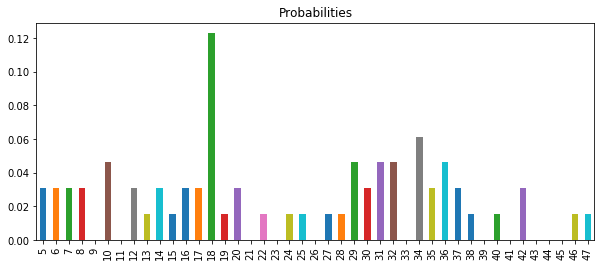

In [44]:
ax = probs.plot(kind='bar', figsize=(10, 4))
ax.set_title("Probabilities");

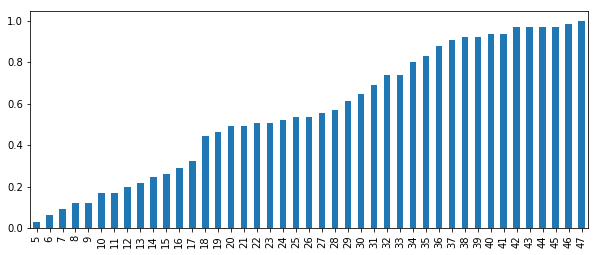

In [47]:
probs.cumsum().plot.bar(figsize=(10, 4), color='C0');

In [52]:
ser.head()

0    27
1    30
2    13
3    18
4    28
dtype: int64

In [65]:
list(range(5, 50, 5))

[5, 10, 15, 20, 25, 30, 35, 40, 45]

In [64]:
list(range(5, 51, 5))

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [67]:
list(range(5, 54, 5))

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [59]:
#ser.value_counts(bins=range(4, 50, 5))  # Does not quite work as we need

In [69]:
ser.head()

0    27
1    30
2    13
3    18
4    28
dtype: int64

In [70]:
ser

0     27
1     30
2     13
3     18
4     28
5     10
6     32
7     37
8     31
9     17
10    18
11    31
12    34
13    18
14    20
15    16
16    38
17    14
18    36
19    30
20    18
21    29
22    16
23    10
24    17
25    40
26    32
27    18
28     5
29    18
      ..
35    47
36    35
37    34
38    19
39     8
40    12
41    36
42    42
43    12
44    34
45     7
46    35
47    25
48     7
49    34
50    46
51    31
52    14
53    29
54    10
55     6
56    36
57     6
58    18
59    24
60     8
61    22
62     5
63    32
64    20
Length: 65, dtype: int64

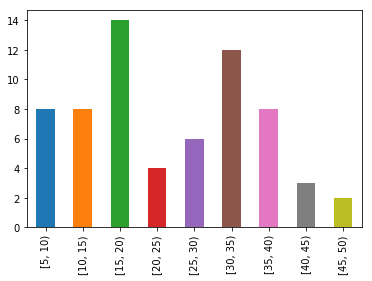

In [74]:
pd.cut(ser, range(5, 51, 5), right=False).value_counts().sort_index().plot.bar();

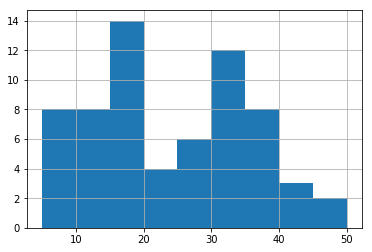

In [79]:
ser.hist(bins=range(5, 51, 5));

In [81]:
ser.median()

22.0

In [80]:
ser.mean()

23.630769230769232

In [82]:
ser.head()

0    27
1    30
2    13
3    18
4    28
dtype: int64

In [90]:
[5] * 5

[5, 5, 5, 5, 5]

In [111]:
%%timeit
survey = []
for class_size in data:
    survey.extend([class_size] * class_size)

survey = pd.Series(survey)
survey.mean()

773 µs ± 76.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [93]:
survey.mean()

29.061197916666668

In [105]:
%timeit ser.repeat(ser)

259 µs ± 75.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [109]:
%timeit ser.repeat(ser).mean()

369 µs ± 75.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [113]:
ser.mean()

23.630769230769232

In [112]:
(ser ** 2).sum() / ser.sum()

29.061197916666668

## Exercise 2: Tossing a biased coin

1. Create a function that simulates a biased coin, which takes a parameter `p_head` between 0 and 1 (with a default value of 0.5) representing the probability of having a "head" and returns `True` or `False` (head and tail) randomly on each call
2. Perform 1000 experiments and plot the evolution of the ratio of heads to check that it converges to the specified value (hint: reuse the logic from the previous session)
3. What's the probability of tossing the coin 6 times with `p_head=0.7` and having 6 heads?
4. Set the number of tosses to 6 and `p_head=0.7`, plot the simulation of all possible number of heads (0, 1, 2, ..., 6) and retrieve all the "empirical probabilities" (hint: the "last value" of the simulation)
5. Plot the probabilities in a bar graph
6. Import the **binomial** distribution from `scipy.stats`, create a random variable with `n=6` and `p=0.7`, and plot its _probability mass function_ (PMF). Does it ring a bell?

![Tossing a coin](img/tosses.png)

In [1]:
import random

In [16]:
random.random()

0.26414436286343546

In [49]:
import numpy as np

In [53]:
def toss_coin_alt(p_head=0.5):
    return np.random.choice(["Head", "Tail"], p=[p_head, 1 - p_head])

In [17]:
def toss_coin(p_head=0.5):
    return random.random() < p_head

In [47]:
toss_coin(0.5)

True

In [113]:
import pandas as pd

In [122]:
import seaborn
seaborn.set()

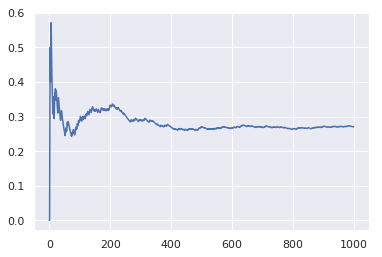

In [123]:
p_head = 0.3

def run_simulation(num_times, p_head):
    results = []
    graph = []
    for _ in range(num_times):
        results.append(toss_coin(p_head))
        graph.append(results.count(True) / len(results))

    return pd.Series(graph)

graph = run_simulation(1_000, p_head)
graph.plot();

In [133]:
import matplotlib.pyplot as plt

In [125]:
def toss_coin_n_times(num_tosses, p_head, num_heads):
    coin_results = [toss_coin(p_head) for _ in range(num_tosses)]
    return coin_results.count(True) == num_heads

In [130]:
def run_simulation(num_times, num_tosses, p_head, num_heads):
    results = []
    graph = []
    for _ in range(num_times):
        results.append(toss_coin_n_times(num_tosses, p_head, num_heads))
        graph.append(results.count(True) / len(results))

    return pd.Series(graph)

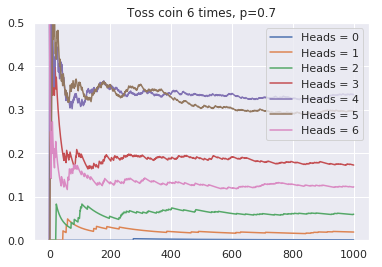

In [144]:
probabilities = {}
for num_heads in range(7):
    graph = run_simulation(1_000, 6, 0.7, num_heads)
    graph.plot(label="Heads = {}".format(num_heads))
    probabilities[num_heads] = graph.iloc[-1]

plt.ylim(0, 0.5)
plt.legend()
plt.title("Toss coin 6 times, p=0.7");

<BarContainer object of 7 artists>

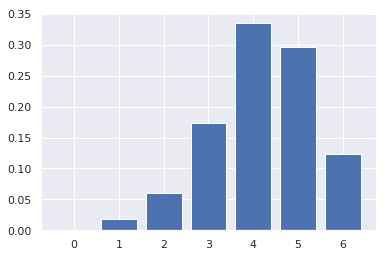

In [145]:
plt.bar(probabilities.keys(), probabilities.values())

In [121]:
0.7 ** 6

0.11764899999999996

In [143]:
from scipy import stats as st

In [146]:
rv = st.binom(n=6, p=0.7)

<BarContainer object of 7 artists>

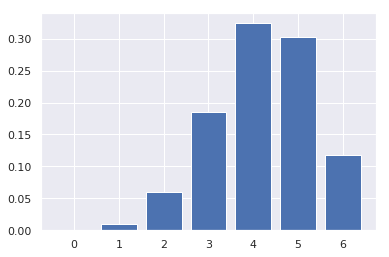

In [148]:
plt.bar(range(7), rv.pmf(range(7)))